### Step 1 : Import Necessary Libraries and Load the Dataset
Begin by importing the required libraries and loading your dataset:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Order_Detail = pd.read_csv(r'C:\Users\user\Downloads\Order_details-masked.csv')

In [15]:
Order_Detail.head(10)

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
5,PERSON_6,PERSON_6@gmail.com,"PRODUCT_34,PRODUCT_66,PRODUCT_58,PRODUCT_83",01/03/2021 11:06:34
6,PERSON_7,PERSON_7@gmail.com,PRODUCT_75,01/03/2021 12:02:00
7,PERSON_8,PERSON_8@gmail.com,"PRODUCT_63,PRODUCT_90,PRODUCT_27,PRODUCT_5",01/03/2021 12:31:10
8,PERSON_9,PERSON_9@outlook.com,PRODUCT_26,01/03/2021 12:51:46
9,PERSON_10,PERSON_10@gmail.com,PRODUCT_63,01/03/2021 12:52:29


### Step 2: Convert Transaction Dates to Datetime and Extract Hour

#### Convert the 'Transaction Date' column to datetime format and extract the hour to analyze sales distribution over different hours:

In [16]:
# here we have taken Transaction
# date column
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

# After that we extracted hour 
# from Transaction date column
Order_Details['Hour'] = (Order_Details['Time']).dt.hour



#### 3. Identify the Busiest Hours
Determine the frequency of transactions for each hour to find the busiest times:

In [17]:
# n =24 in this case, can be modified
# as per need to see top 'n' busiest hours
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] 

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]

#### Step 4:
Finally, we stack the indices (hour) and frequencies together to yield the final result.

In [18]:
tmost = np.column_stack((timemost1,timemost2))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Cumulative Number of Purchases 

12		51
23		51
22		45
19		42
15		41
21		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


### Step 5: 
Before we can create an appropriate data visualization, we must make the list slightly more customizable. To do so, we gather the hourly frequencies and perform the following tasks:

In [19]:
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)
    
timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

#### Step 6: 
For data visualization, we will proceed with Matplotlib for better comprehensibility, as it is one of the most convenient and commonly used libraries. 
The commands written below are mainly to ensure that X-axis takes up the values of hours and Y-axis takes up the importance of the number of transactions affected, and also various other aspects of a line chart, including color, font, etc., to name a few.

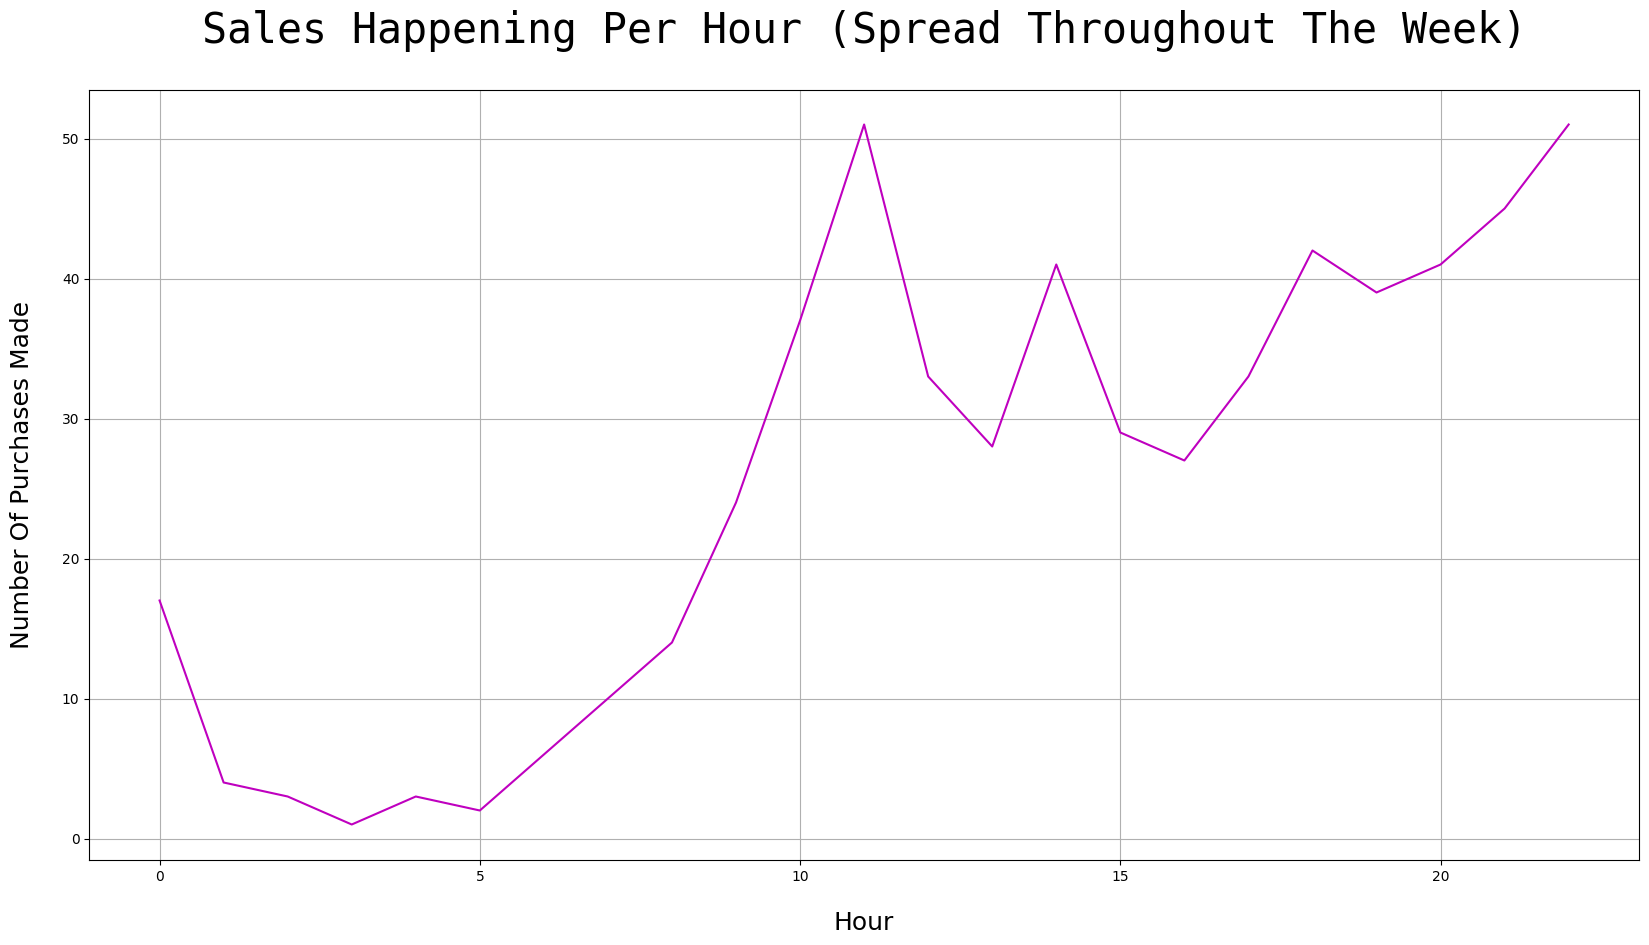

In [20]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()